In [1]:
import numpy as np
import pandas as pd
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/guideClean.csv')
data.head()

,Org Name,Total Assets,Total Revenue,Number of Employees
0,"Connection Fund, Inc.",11383533.0,10003333.0,63.0
1,Essex County Arc Facilities Inc,4258458.0,706595.0,0.0
2,"The Urban Assembly, Inc.",2165941.0,5242311.0,115.0
3,Amityville Cemetery Association,10553423.0,1203866.0,2.0
4,Cedar Grove Cemetery Association,368609853.0,21806707.0,139.0


In [3]:
neighbor = []
index = data.index

data["Distance"] = 0

for row in range(len(index)):
    asset, revenue, employees = data.iloc[row][1], data.iloc[row][2], data.iloc[row][3]
    distance = math.sqrt((asset - 26124414)**2 + (revenue - 25452329)**2 + (employees- 104)**2)
    neighbor.append(distance)

    data.iloc[row, data.columns.get_loc("Distance")] = distance

org_neighbor = neighbor
neighbor.sort()
top_ten = neighbor[:10]
companies = ""

for value in top_ten:
    #finds the row the company is in
    row = org_neighbor.index(value)
    #find the company name
    companies += data['Org Name'].iloc[row] + "\n"
print(companies)


Connection Fund, Inc.
Essex County Arc Facilities Inc
The Urban Assembly, Inc.
Amityville Cemetery Association
Cedar Grove Cemetery Association
Cedar Lawn Cemetary Association
Boy Scouts of America
Edith and Carl Marks Jewish Community House of Bensonhurst Inc
Friends Academy
The Packer Collegiate Institute



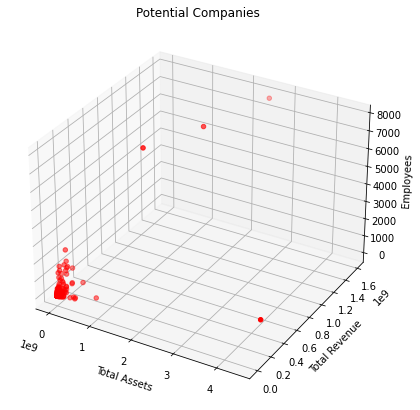

In [4]:
# Data for three-dimensional scattered points
xdata = data.iloc[:, 1]
ydata = data.iloc[:, 2]
zdata = data.iloc[:, 3]

# creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection='3d')
plt.title("Potential Companies")

ax.scatter3D(26124414, 25452329, 104, color='green')

ax.scatter3D(xdata, ydata, zdata, color='red')

ax.set_xlabel('Total Assets')
ax.set_ylabel('Total Revenue')
ax.set_zlabel('Employees')
"""
ax.set_zlim(0,1000)
ax.set_ylim(0,0.6)
ax.set_xlim(0,1)
"""

plt.show()
